## Titanic Survival Prediction 

### Table of content

### Features of dataset:

1. **PassengerId**: A unique identifier for each passenger.
2. **Survived**: Indicates whether the passenger survived (1) or not (0).
3. **Pclass**: Ticket class (1st, 2nd, or 3rd class).
4. **Name**: Name of the passenger.
5. **Sex**: Gender of the passenger.
6. **Age**: Age of the passenger.
7. **SibSp**: Number of siblings or spouses aboard the Titanic.
8. **Parch**: Number of parents or children aboard the Titanic.
9. **Ticket**: Ticket number.
10. **Fare**: Fare paid for the ticket.
11. **Cabin**: Cabin number.
12. **Embarked**: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).


In [1]:
#Importing Libraries
#Basic
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from collections import Counter

#For model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix


from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder


In [2]:
df = pd.read_csv('Titanic_Dataset.csv') 

### EDA

In [3]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Observe that there are 177 missing values in Age and 687 in cabin and 2 in Embarked variables.

In [8]:
# remove unecessarry columns since it contains no more useful information.
df = df.drop(['Ticket', 'Name','Fare','PassengerId','Embarked'], axis=1)

In [9]:
# Handling missing values by filling them with the median for specific columns
columns = ['Age']
for col in columns:
    df[col].fillna(df[col].median(), inplace=True)

In [10]:
# Create a new column cabinbool indicating 
# if the cabin value was given or was NaN 
df["CabinBool"] = (df["Cabin"].notnull().astype('int')) 

# Delete the column 'Cabin' from test 
# and train dataset 
df = df.drop(['Cabin'], axis=1) 


In [11]:
# Mapping 'male' to 0 and 'female' to 1
df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})

In [12]:
df.isna().sum()

Survived     0
Pclass       0
Sex          0
Age          0
SibSp        0
Parch        0
CabinBool    0
dtype: int64

There is no missing values now.

In [13]:
# survivor count
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Sex        891 non-null    int64  
 3   Age        891 non-null    float64
 4   SibSp      891 non-null    int64  
 5   Parch      891 non-null    int64  
 6   CabinBool  891 non-null    int32  
dtypes: float64(1), int32(1), int64(5)
memory usage: 45.4 KB


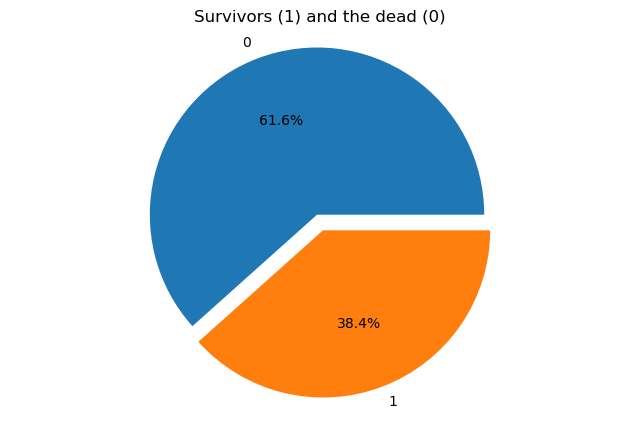

In [15]:
# Create a pie chart for 'Survived' column
plt.figure(figsize=(8, 5))
df['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', shadow=False)
plt.title('Survivors (1) and the dead (0)')
plt.ylabel('')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

There are approximately 61.6% of the people in the dataset did not survive the Titanic disaster.

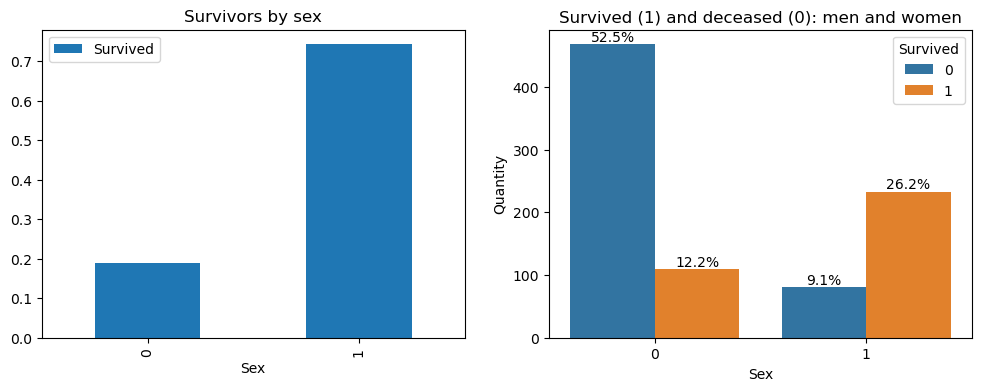

In [16]:
f, ax = plt.subplots(1, 2, figsize=(12, 4)) 
df[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0]) 
ax[0].set_title('Survivors by sex') 
sns.countplot(x='Sex', hue='Survived', data=df, ax=ax[1]) 
ax[1].set_ylabel('Quantity') 
ax[1].set_title('Survived (1) and deceased (0): men and women') 

# Calculate percentages and annotate the bars
total = float(len(df))
for p in ax[1].patches:
    height = p.get_height()
    ax[1].annotate(f'{height/total:.1%}', (p.get_x() + p.get_width() / 2., height),
                   ha='center', va='bottom', fontsize=10, color='black')

plt.show() 

From graph,in tatanic diaster there are more female survived than male apporximtely, 26.2% females are survived.

###  Model Training

In [17]:
# Drop the Survived and PassengerId 
# column from the trainset 
predictors = df.drop(['Survived'], axis=1) 
target = df["Survived"] 
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size=0.2, random_state=0) 


1. Using Logistic regression

In [18]:
# Initialize and train a Logistic Regression model
lr = LogisticRegression(max_iter=1000)  
lr.fit(x_train, y_train)

# Make predictions
y_pred1 = lr.predict(x_val)

# Find the accuracy score of the model 
acc_logireg = round(accuracy_score(y_pred1, y_val) * 100, 2) 
print("The accuracy of logistic regression model:",acc_logireg,"%") 


The accuracy of logistic regression model: 83.24 %


2. Using Random forest

In [19]:
randomforest = RandomForestClassifier() 

# Fit the training data along with its output 
randomforest.fit(x_train, y_train) 
y_pred = randomforest.predict(x_val) 

# Find the accuracy score of the model 
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2) 
print("The accuracy of random forest model:",acc_randomforest,"%") 


The accuracy of random forest model: 81.01 %


#### Inference from EDA and model:
1. Survival Rate: Around 61.6% of the individuals in the dataset did not survive the Titanic disaster.

2. Gender Impact: A graph revealed that a higher proportion of females survived compared to males, approximately 26.2% of females survived.
3. Model Performance: Both Logistic Regression and Random Forest models best fitted.

##### Use of fitted model:

In [20]:

# New data (features) for prediction
new_data = [[3, 1, 26, 0, 0, 1]]  

# Make predictions on the new data 
predictions1 = lr.predict(new_data)
predictions2 = randomforest.predict(new_data)

# Display the predictions
print("survival:",predictions1)
print("survival:",predictions2)


survival: [1]
survival: [1]
